Value Function (V):
[[ -1.39  -0.43   0.63   1.81   3.12]
 [ -0.43   0.63   1.81   3.12   4.58]
 [-10.   -10.   -10.     4.58   6.2 ]
 [  1.81   3.12   4.58   6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]]


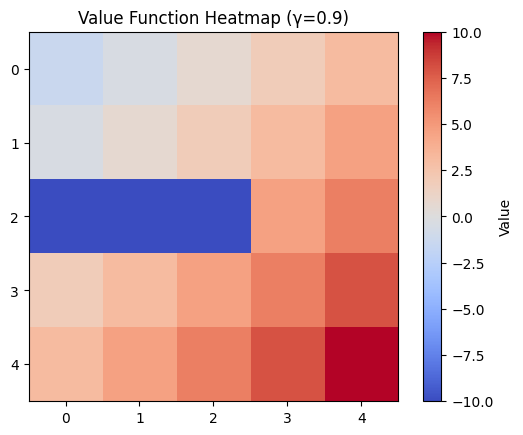


Value Function with γ=0.5:
[[ -1.95  -1.91  -1.81  -1.62  -1.25]
 [ -1.91  -1.81  -1.62  -1.25  -0.5 ]
 [ -4.    -6.   -10.    -0.5    1.  ]
 [ -1.62  -1.25  -0.5    1.     4.  ]
 [ -1.25  -0.5    1.     4.    10.  ]]

Value Function with γ=0.9:
[[ -1.39  -0.43   0.63   1.81   3.12]
 [ -0.43   0.63   1.81   3.12   4.58]
 [-10.   -10.   -10.     4.58   6.2 ]
 [  1.81   3.12   4.58   6.2    8.  ]
 [  3.12   4.58   6.2    8.    10.  ]]

Value Function with γ=0.99:
[[  1.5    2.53   3.56   4.61   5.67]
 [  2.53   3.56   4.61   5.67   6.73]
 [-11.79 -10.9  -10.     6.73   7.81]
 [  4.61   5.67   6.73   7.81   8.9 ]
 [  5.67   6.73   7.81   8.9   10.  ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grid setup
N = 5
gamma = 0.9
goal = (4, 4)
pit = (2, 2)

# Rewards
def reward(state):
    if state == goal:
        return 10
    elif state == pit:
        return -10
    else:
        return -1

# Fixed policy: Right if possible else Down
def policy(state):
    x, y = state
    if state == goal or state == pit:
        return None  # terminal state
    if y < N - 1:  # can move right
        return (x, y + 1)
    elif x < N - 1:  # else move down
        return (x + 1, y)
    return state  # stay if no moves possible

# Value Iteration under fixed policy
def compute_value_function(gamma=0.9, iterations=100):
    V = np.zeros((N, N))

    for _ in range(iterations):
        new_V = np.copy(V)
        for i in range(N):
            for j in range(N):
                state = (i, j)
                if state == goal or state == pit:
                    new_V[i, j] = reward(state)
                else:
                    next_state = policy(state)
                    new_V[i, j] = reward(state) + gamma * V[next_state]
        V = new_V
    return V

# Compute Value Function
V = compute_value_function(gamma)

# Display values
print("Value Function (V):")
print(np.round(V, 2))

# Visualization
plt.imshow(V, cmap='coolwarm', interpolation='nearest')
plt.colorbar(label="Value")
plt.title(f"Value Function Heatmap (γ={gamma})")
plt.show()

# Compare with different gammas
for g in [0.5, 0.9, 0.99]:
    Vg = compute_value_function(g)
    print(f"\nValue Function with γ={g}:")
    print(np.round(Vg, 2))
